# DISTRIBUSI SAMPLE



> Distribusi sample (atau distribusi sampel) adalah distribusi probabilitas dari sebuah sampel data yang diperoleh dari populasi tertentu. Distribusi sample menggambarkan frekuensi kemunculan nilai-nilai dalam sampel dan dapat membantu kita untuk memahami karakteristik populasi yang lebih besar. Distribusi sample dapat digunakan untuk menghitung nilai-nilai statistik seperti mean, variance, dan standar deviasi, yang kemudian dapat digunakan untuk membuat inferensi tentang populasi secara keseluruhan.



In [ ]:
!pip install pyarrow --user



> Tahap pertama adalah melakukan import library yang akan digunakan.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow
from scipy.stats import sem, t
import scipy.stats as stats
import statsmodels.api as sm
import statistics as stat



> Fungsi "pd.read_excel()" adalah fungsi panda yang membaca file Excel dan membuat objek DataFrame dari datanya. Argumen untuk fungsi tersebut adalah jalur file atau URL ke file Excel. Dalam hal ini, jalur file adalah "Manager Salary Survey 2021-FINAL (2).xlsx".

> Setelah kode dieksekusi, DataFrame "df" akan berisi data dari file Excel, yang kemudian dapat dimanipulasi dan dianalisis menggunakan panda dan pustaka Python lainnya.

In [ ]:
df = pd.read_excel("Manager Salary Survey 2021-FINAL (2).xlsx")

> Selanjutnya kita dapat melihat 5 data teratas dari dataframe

In [ ]:
df.head(5)

,time,age,industry,job_title,need_additional_context,salary,monetary_compentation,currency,indicate_currency,income_additional_contex,country,US_state,city,work_experience_overall,work_experince_field,hights_education_complate,gender,your_race,USD Salary,country_clean
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0000,United States
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,?,White,67786.6098,United Kingdom
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0000,United States
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0000,United States
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0000,United States


> Selanjutnya kita akan menghilangkan 1 outliner yaitu data salary yang bernilai $102000000.0.

In [ ]:
df = df[df["USD Salary"] != 102000000.0]

> Selanjutnya kita membuat variabel baru untuk menyimpan data dimana dataset yang digunakan merupakan data dengan job_title yaitu "Software Engineer".

In [ ]:
datas = df[(df["job_title"]== "Software Engineer")]

> Selanjutnya kita akan melihat tampilan grafik box plot setelah outliner dihilangkan. Output dari kode di bawah adalah grafik box plot dari data nilai dengan garis horizontal yang menunjukkan nilai maksimum (garis merah putus-putus), rata-rata (garis hijau putus-putus), dan media (garis biru putus-putus).

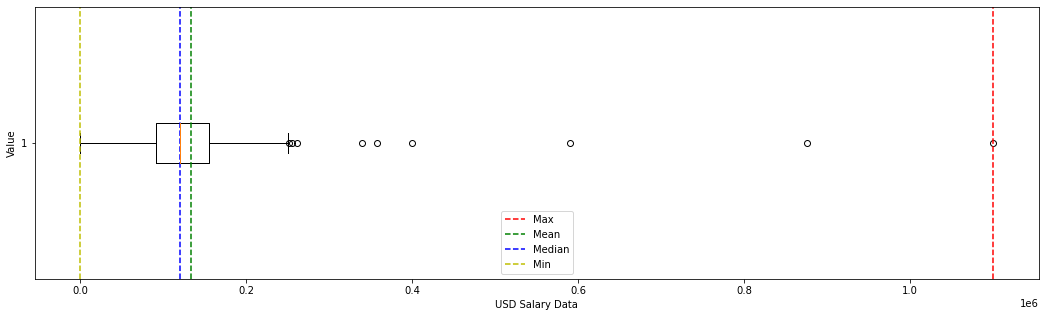

--------------------------------------------
Max = 1100000.0
Mean = 133683.03125596154
Median = 120000.0
Min = 145.0


In [ ]:
plt.figure(figsize=(18,5))
plt.boxplot(datas["USD Salary"], vert=False)

nilai_max = np.max(datas["USD Salary"])
nilai_mean = np.mean(datas["USD Salary"])
nilai_median = np.median(datas["USD Salary"])
nilai_min = np.min(datas["USD Salary"])

plt.axvline(nilai_max, color='r', linestyle='--', label='Max')
plt.axvline(nilai_mean, color='g', linestyle='--', label='Mean')
plt.axvline(nilai_median, color='b', linestyle='--', label='Median')
plt.axvline(nilai_min, color='y', linestyle='--', label='Min')

plt.legend()

plt.xlabel('USD Salary Data')
plt.ylabel('Value')
plt.show()
print("--------------------------------------------")
print("Max =", nilai_max)
print("Mean =", nilai_mean)
print("Median =", nilai_median)
print("Min =", nilai_min)
# Output dari kode di atas adalah grafik box plot pada data nilai dengan 
# garis horizontal yang menunjukkan nilai maksimum (garis merah putus-putus), rata-rata (garis hijau putus-putus), 
#dan median (garis biru putus-putus). Anda dapat memodifikasi tampilan grafik sesuai dengan kebutuhan Anda.

> Selanjutnya kita akan menghilangkan 1 outliner yaitu data salary yang bernilai $1100000.0.

In [ ]:
# Disini kita menghilangkan 1 outliner
datas = datas[datas["USD Salary"] != 1100000.0]
#teradpat 1 outlier
len(df)

27873

> Dan ketika kita melakukan describe maka data max akan berubah menjadi data tertinggi nomor 2.


In [ ]:
datas.describe()

,salary,monetary_compentation,USD Salary
count,2.850000e+02,212.000000,285.000000
mean,1.371085e+05,42514.816038,130292.445401
std,1.008024e+05,87348.880463,74248.727578
min,1.450000e+02,0.000000,145.000000
25%,9.400000e+04,1900.000000,90977.073000
50%,1.210000e+05,10000.000000,120000.000000
75%,1.550000e+05,30375.000000,155000.000000
max,1.200000e+06,500000.000000,875000.000000


# NORMAL DISTRIBUTION (USD SALARY)

> Distribusi normal adalah distribusi probabilitas kontinu yang banyak digunakan dalam statistik, sains, teknik, dan keuangan. Ia juga dikenal sebagai distribusi Gaussian atau kurva lonceng, karena kurva berbentuk loncengnya yang simetris.

> Kode di bawah menghasilkan plot KDE (perkiraan kepadatan kernel) dari variabel "USD Salary" dari kumpulan data yang disebut "data" menggunakan pustaka seaborn dengan Python. Plot diwarnai hijau tua dan dibuat menggunakan parameter "kind" yang disetel ke "kde".

> Kode ini juga menyertakan anotasi yang menampilkan kemiringan dan kurtosis variabel "USD Salary" pada plot. Perulangan for mengulangi dua sumbu plot dan menambahkan nilai kemiringan dan kurtosis ke sudut kanan atas setiap sumbu menggunakan fungsi "ax.text". Nilai skewness dihitung menggunakan fungsi "skew" dari library pandas pada kolom "USD Salary" pada dataset, sedangkan nilai kurtosis dihitung menggunakan fungsi "kurt" dari library pandas pada kolom yang sama.

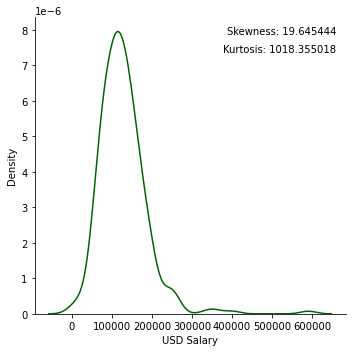

In [ ]:
g = sns.displot(data=datas, x="USD Salary",kind ='kde',color='darkgreen')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['USD Salary'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['USD Salary'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

# NORMAL DISTRIBUTION (MONETARY COMPETITION)

> Kode di bawah menghasilkan plot KDE (perkiraan kepadatan kernel) dari variabel "Monetary Competition" dari kumpulan data yang disebut "data" menggunakan pustaka seaborn dengan Python. Plot diwarnai hijau tua dan dibuat menggunakan parameter "kind" yang disetel ke "kde".

> Kode ini juga menyertakan anotasi yang menampilkan kemiringan dan kurtosis variabel "Monetary Competition" pada plot. Perulangan for mengulangi dua sumbu plot dan menambahkan nilai kemiringan dan kurtosis ke sudut kanan atas setiap sumbu menggunakan fungsi "ax.text". Nilai skewness dihitung menggunakan fungsi "skew" dari library pandas pada kolom "Monetary Competition" pada dataset, sedangkan nilai kurtosis dihitung menggunakan fungsi "kurt" dari library pandas pada kolom yang sama.

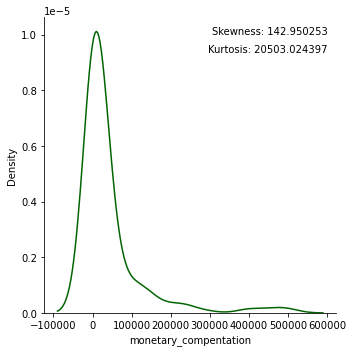

In [ ]:
g = sns.displot(data=datas, x="monetary_compentation",kind ='kde',color='darkgreen')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['monetary_compentation'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['monetary_compentation'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

# DISTRIBUTION SAMPLING (WORK EXPERINCE OVERALL)

> Sampling distribusi adalah proses menghasilkan sampel nilai acak dari distribusi probabilitas. Dalam statistik dan analisis data, pengambilan sampel dari suatu distribusi dapat digunakan untuk memperkirakan sifat-sifat distribusi, seperti mean, varians, dan kuantilnya.

> Salah satu cara untuk melakukan sampling distribusi adalah dengan menggunakan metode transformasi terbalik. Metode ini melibatkan transformasi variabel acak seragam pada interval [0,1] menjadi variabel acak dari distribusi yang diinginkan. Ini dilakukan dengan terlebih dahulu menemukan invers dari fungsi distribusi kumulatif (CDF) dari distribusi yang diinginkan, dan kemudian menerapkan fungsi invers ini ke variabel acak seragam. Nilai yang dihasilkan akan memiliki distribusi yang diinginkan.

In [ ]:
datas['work_experience_overall'].value_counts()

2 - 4 years         72
5-7 years           70
11 - 20 years       58
8 - 10 years        55
1 year or less      13
21 - 30 years       12
31 - 40 years        3
41 years or more     1
Name: work_experience_overall, dtype: int64

In [ ]:
data_wo = datas['work_experience_overall'].values.tolist()

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Work Experience Overall", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Work Experience Overall" dalam kumpulan data.

Text(0, 0.5, 'Frequency')

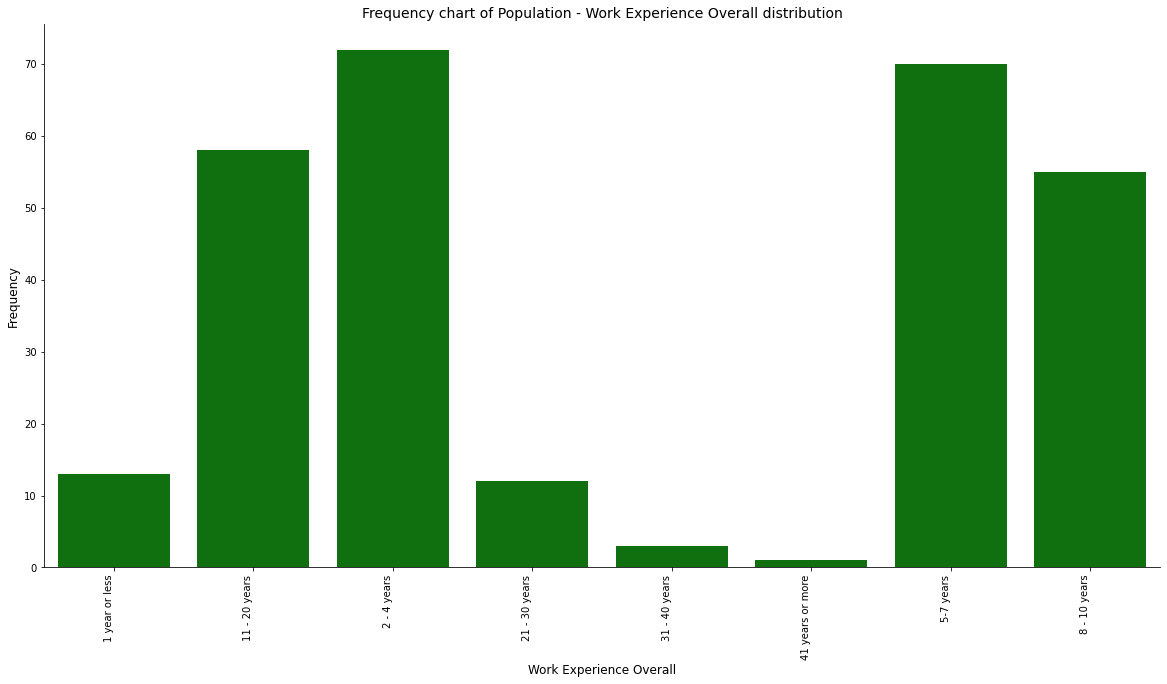

In [ ]:
pop_values, pop_frequencies = np.unique(data_wo, return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'green')

# Plot formatting
plt.title('Frequency chart of Population - Work Experience Overall distribution',fontsize='14')
sns.despine()
plt.xlabel('Work Experience Overall',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (WORK EXPERIENCE FIELD)

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Work Experience Field", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Work Experience Field" dalam kumpulan data.

Text(0, 0.5, 'Frequency')

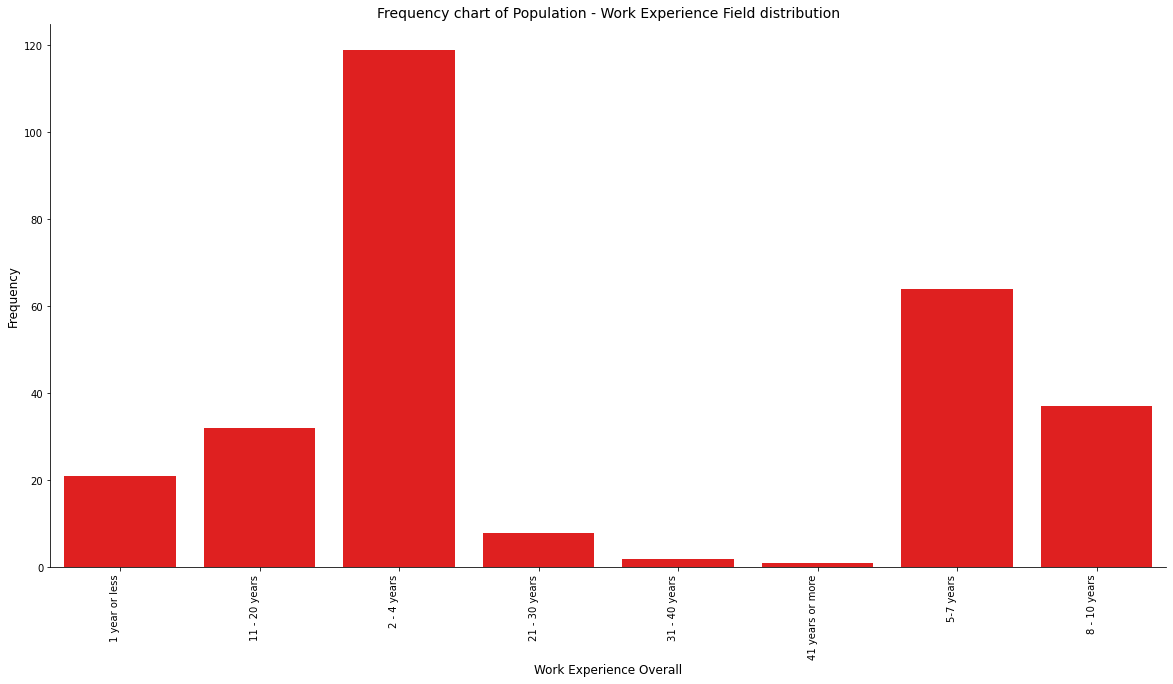

In [ ]:
pop_values, pop_frequencies = np.unique(datas['work_experince_field'].values.tolist(), return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'red')

# Plot formatting
plt.title('Frequency chart of Population - Work Experience Field distribution',fontsize='14')
sns.despine()
plt.xlabel('Work Experience Overall',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (EDUCATION)

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Education", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Education" dalam kumpulan data.

Text(0, 0.5, 'Frequency')

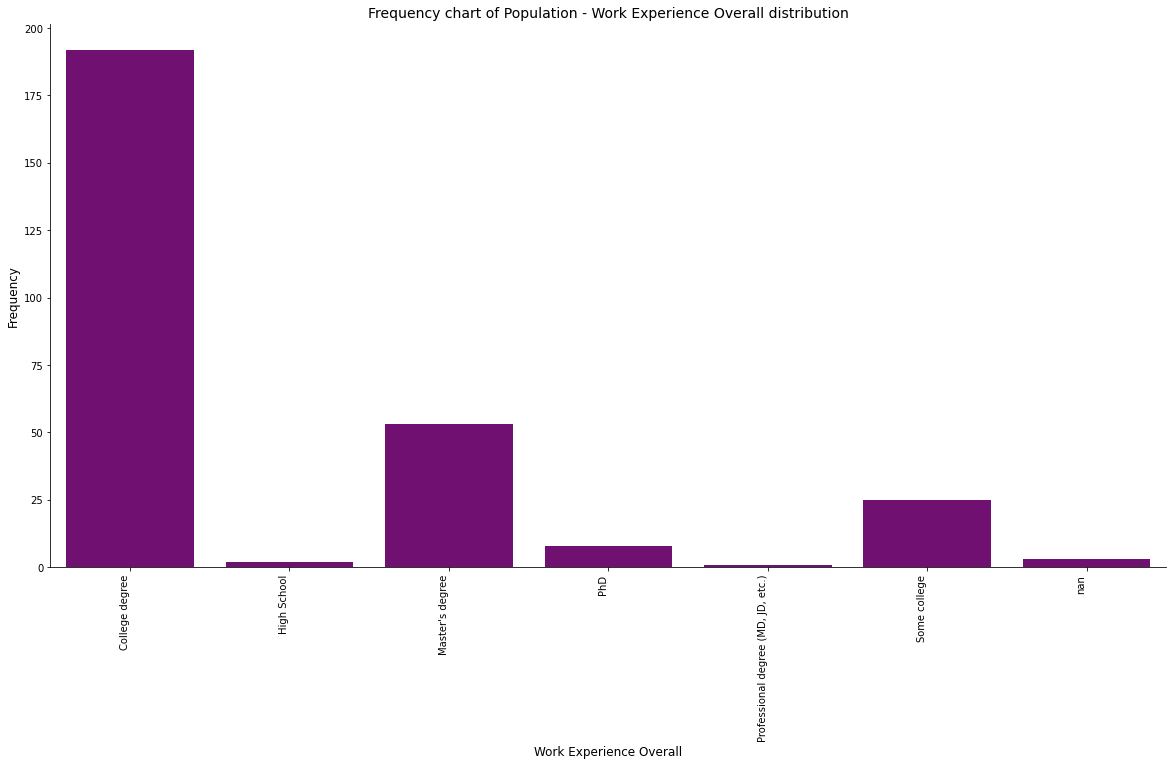

In [ ]:
pop_values, pop_frequencies = np.unique(datas['hights_education_complate'].values.tolist(), return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'purple')

# Plot formatting
plt.title('Frequency chart of Population - Work Experience Overall distribution',fontsize='14')
sns.despine()
plt.xlabel('Work Experience Overall',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (GENDER) 

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Gender", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Gender" dalam kumpulan data.

In [ ]:
datas = datas[(datas["gender"].isna() == False)]

Text(0, 0.5, 'Frequency')

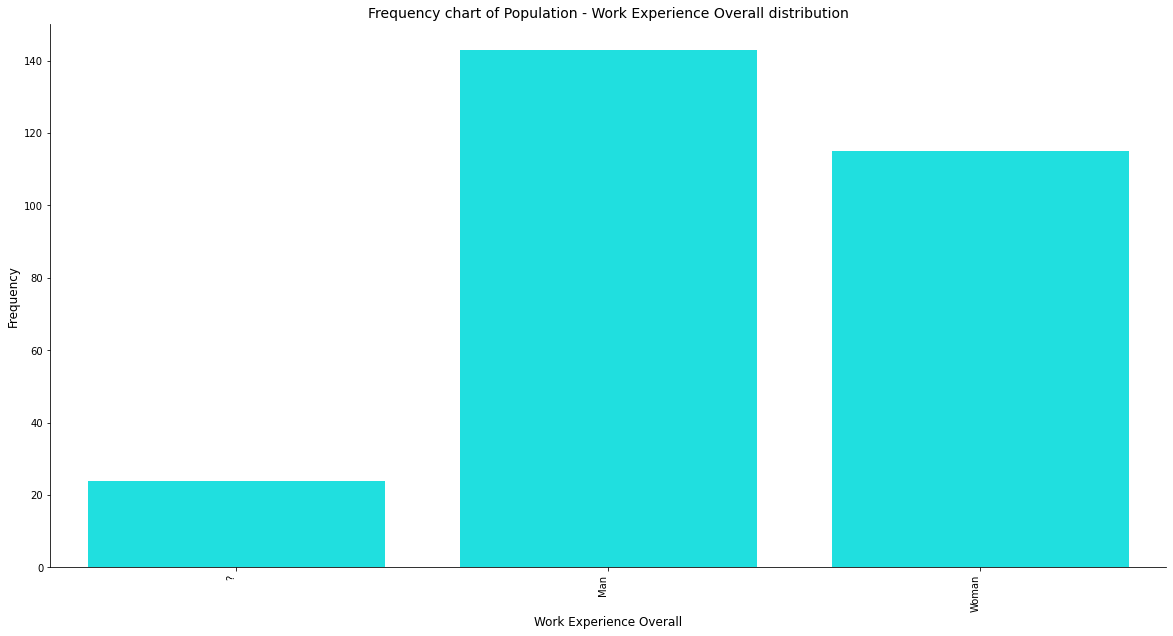

In [ ]:
pop_values, pop_frequencies = np.unique(datas['gender'].values.tolist(), return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'Aqua')

# Plot formatting
plt.title('Frequency chart of Population - Work Experience Overall distribution',fontsize='14')
sns.despine()
plt.xlabel('Work Experience Overall',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (COUNTRY)

In [ ]:
datas['country_clean'].value_counts()

United States     230
Canada             11
United Kingdom      6
Germany             6
Australia           4
France              4
Ireland             2
Austria             2
India               2
Israel              2
Brazil              1
Switzerland         1
Sweden              1
Netherlands         1
Greece              1
Luxembourg          1
Name: country_clean, dtype: int64

In [ ]:
from pandas.api.types import CategoricalDtype
# define the order of categories
cat_order = CategoricalDtype(categories=['United States', 'Canada', 'United Kingdom', 'Germany', 'Australia', 'France', 
                                         'Ireland', 'Austria', 'India', 'Israel', 'Brazil', 'Switzerland', 'Sweden',
                                        'Netherlands', 'Greece', 'Luxembourg'], ordered=True)

In [ ]:
# convert the column to categorical type with ordered=True
df['country_clean'] = df['country_clean'].astype(cat_order)

In [ ]:
data_country = datas['country_clean'].values.tolist()

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Country Clean", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Country Clean" dalam kumpulan data.

Text(0, 0.5, 'Frequency')

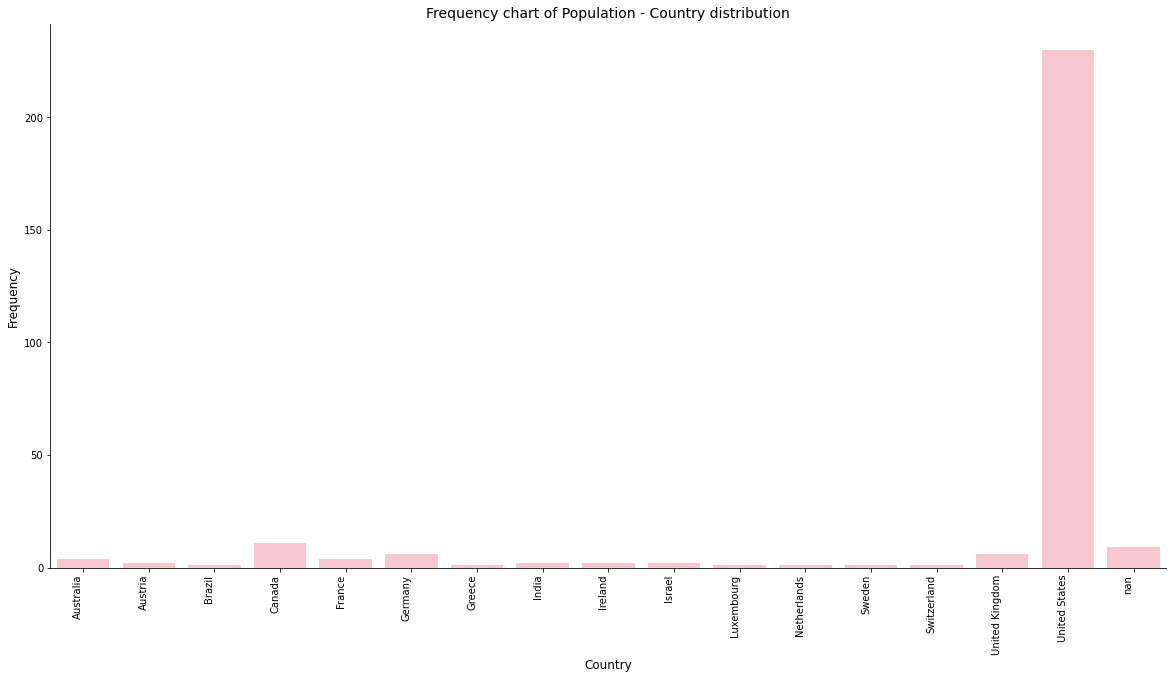

In [ ]:
pop_values, pop_frequencies = np.unique(data_country, return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'pink')

# Plot formatting
plt.title('Frequency chart of Population - Country distribution',fontsize='14')
sns.despine()
plt.xlabel('Country',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (AGE)

> Kode menghasilkan plot batang menggunakan fungsi "barplot" seaborn. Sumbu x plot menunjukkan nilai unik dari variabel "Age", sedangkan sumbu y menunjukkan frekuensi setiap nilai unik.

> Baris "plt.figure(figsize=(20,10))" menetapkan ukuran plot menjadi 20 inci kali 10 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='green')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna hijau.

> Terakhir, kode menggunakan fungsi seaborn "despine" untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel". .

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kategori seperti "Age" dalam kumpulan data.

Text(0, 0.5, 'Frequency')

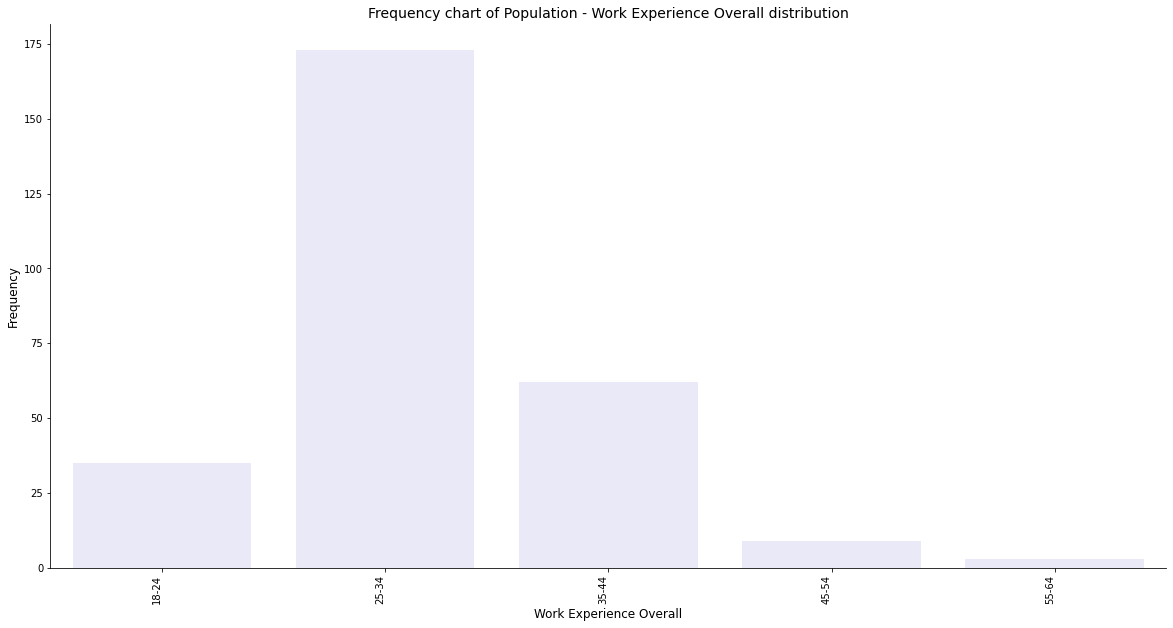

In [ ]:
pop_values, pop_frequencies = np.unique(datas['age'].values.tolist(), return_counts=True)

plt.figure(figsize=(20,10))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'Lavender')

# Plot formatting
plt.title('Frequency chart of Population - Work Experience Overall distribution',fontsize='14')
sns.despine()
plt.xlabel('Work Experience Overall',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 


# DISTRIBUTION SAMPLING (SALARY)

In [ ]:
datas = datas[datas["USD Salary"] != 875000.0]

In [ ]:
data_salary = datas['USD Salary']
data_salary.describe()

count       284.000000
mean     127670.235701
std       59714.099940
min         145.000000
25%       90425.704750
50%      120000.000000
75%      154250.000000
max      590000.000000
Name: USD Salary, dtype: float64

In [ ]:
data_salary.dtype

dtype('float64')

In [ ]:
data_salary = data_salary.astype(int) 

In [ ]:
data_salary.dtype

dtype('int32')

<b>Population Standard deviation<b>

> Kode ini pertama-tama menghitung nilai unik dan frekuensinya untuk variabel "USD Salary" menggunakan fungsi "np.unique" dengan "return_counts=True".

> Baris "plt.figure(figsize=(30,20))" menetapkan ukuran plot menjadi 30 inci kali 20 inci.

> Garis "plt.xticks(ha='right',rotation='90')" memutar label sumbu x sebesar 90 derajat dan menyejajarkannya ke kanan.

> Baris "sns.barplot(x=pop_values,y=pop_frequencies,color='brown')" membuat plot batang dengan "pop_values" pada sumbu x dan "pop_frequencies" pada sumbu y, berwarna cokelat.

> Kode kemudian menggunakan fungsi "despine" seaborn untuk menghapus duri atas dan kanan plot, dan menyetel label judul dan sumbu dengan fungsi "plt.title", "plt.xlabel", dan "plt.ylabel".

> Terakhir, kode mencetak simpangan baku variabel "USD Salary" dalam kumpulan data "data" menggunakan fungsi "np.std" dan pemformatan string.

> Secara keseluruhan, kode ini berguna untuk memvisualisasikan distribusi frekuensi variabel kontinu seperti "USD Salary" dalam kumpulan data dan menghitung standar deviasinya.






Standard deviation of the population  = 59608.877


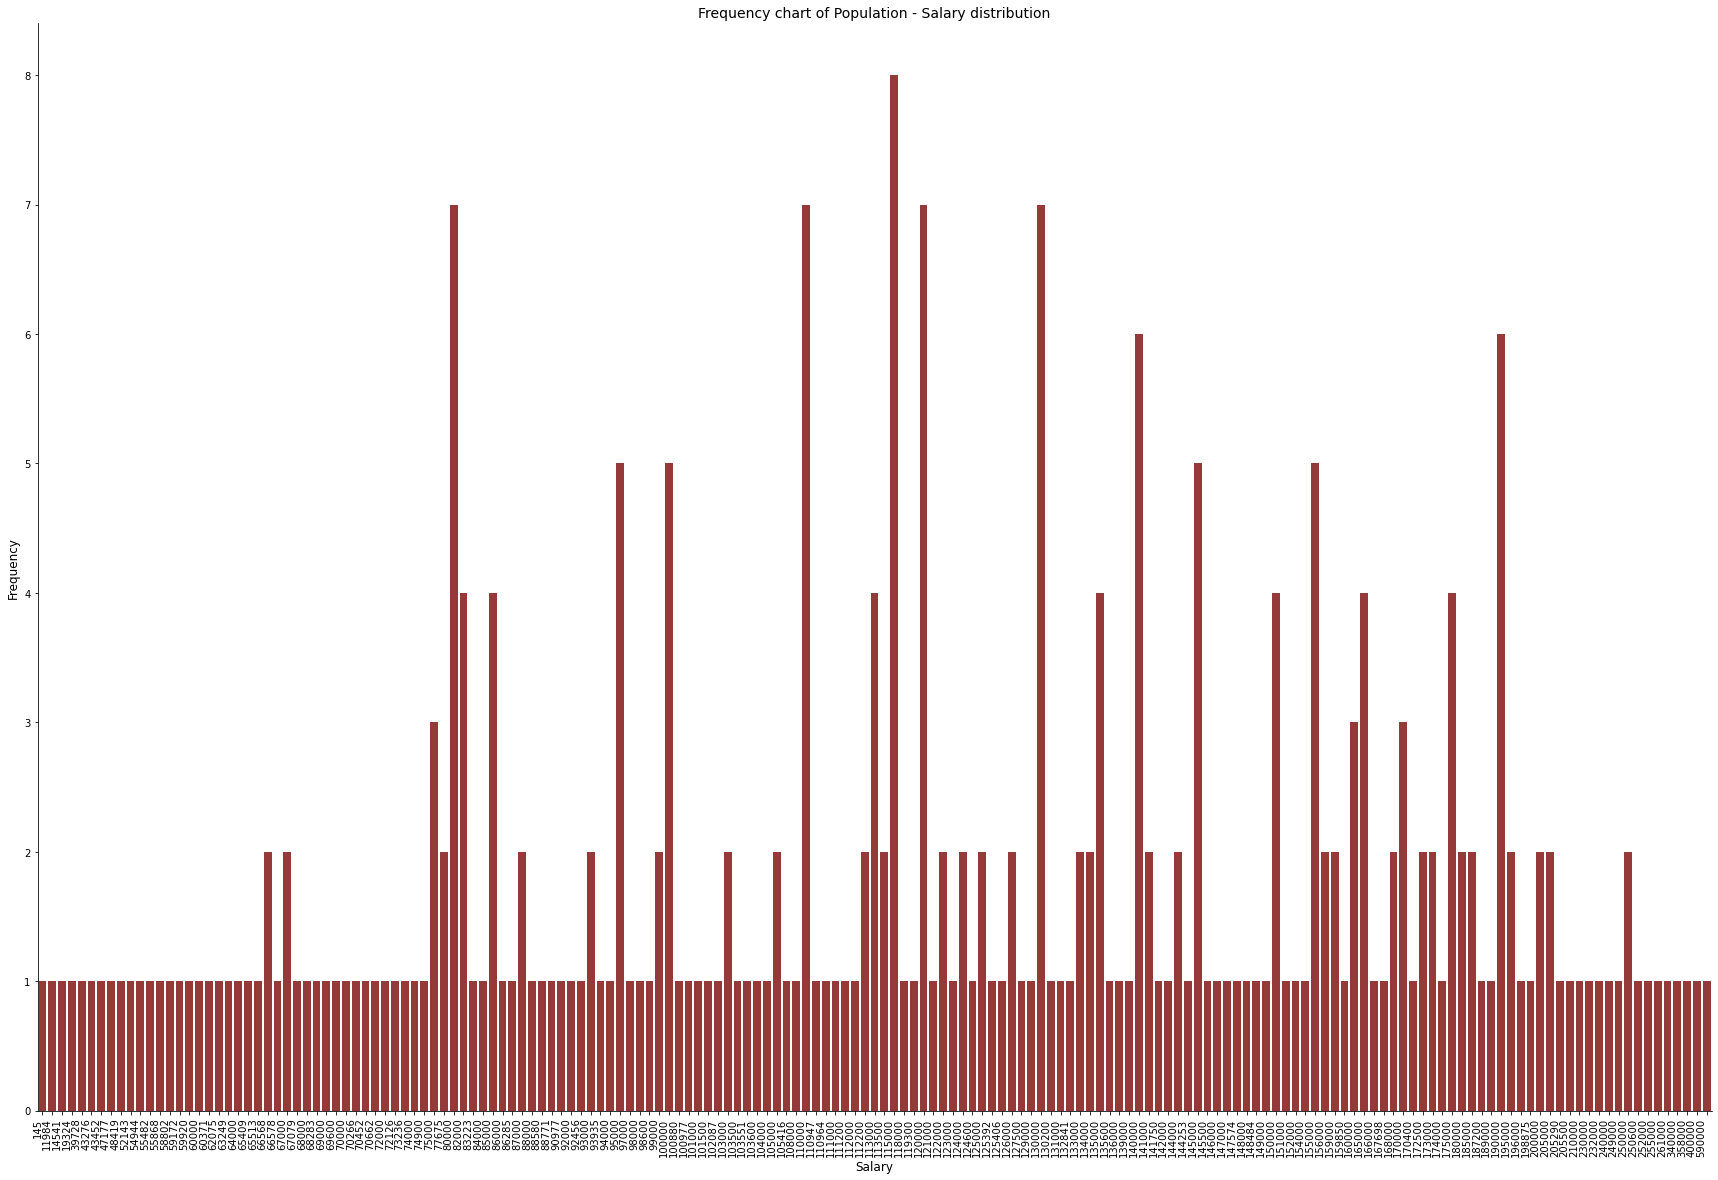

In [ ]:
pop_values, pop_frequencies = np.unique(data_salary, return_counts=True)

plt.figure(figsize=(30,20))
plt.xticks(ha="right",rotation="90")
sns.barplot(x=pop_values,y=pop_frequencies,color = 'brown')

# Plot formatting
plt.title('Frequency chart of Population - Salary distribution',fontsize='14')
sns.despine()
plt.xlabel('Salary',fontsize='12')
plt.ylabel('Frequency',fontsize='12') 

print(f'Standard deviation of the population  = {np.std(datas["USD Salary"]):.3f}')